In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
import edrixs

In [2]:
%matplotlib inline
plt.rcParams['font.size'] = 7

In [3]:
def make_theme(ax):
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.tick_params(which='major', direction='in', left=True, bottom=True, top=True, right=True, width=0.5, length=6)
    ax.tick_params(which='minor', direction='in', left=True, bottom=True, top=True, right=True, width=0.5, length=3)
    for axis in ['top','bottom','left','right']: ax.spines[axis].set_linewidth(0.5)
    
def RIXS_OK(thins, ground_state='px', excited_state='px', phi=0., tth=150.):
    """ calculate RIXS intensity """
    orb_id = dict(px=0, py=2, pz=4) # orbital id
    GS = np.zeros(6, dtype=complex) # ground state
    GS[orb_id[ground_state]] = 1
    ES = np.zeros(6, dtype=complex) # excited state
    ES[orb_id[excited_state]] = 1
    GS = np.dot(GS, edrixs.tmat_r2c('p',True))
    ES = np.dot(ES, edrixs.tmat_r2c('p',True))
    Tmat = edrixs.get_trans_oper('ps')
    Tabs = [np.dot(np.dot(GS,Tmat[i]), [1.,0.]) for i in range(3)]
    Temi = [np.dot(np.dot(ES,Tmat[i]), [1.,0.]) for i in range(3)]
    I_pi, I_sigma = [], []
    for thin in thins:
        pol = [(0, 0), (0, np.pi / 2.0)] # pi
        I_pi.append(0.)
        for j, (alpha, beta) in enumerate(pol):
            ei, ef = edrixs.dipole_polvec_rixs(thin/180.*np.pi, (thin+180.-tth)/180.*np.pi, phi/180.*np.pi, alpha, beta)
            I_pi[-1] += abs(np.dot(ei, Tabs)*np.dot(ef, Temi))**2
        pol = [(np.pi / 2.0, 0), (np.pi / 2.0, np.pi / 2.0)] # sigma
        I_sigma.append(0.)
        for j, (alpha, beta) in enumerate(pol):
            ei, ef = edrixs.dipole_polvec_rixs(thin/180.*np.pi, (thin+180.-tth)/180.*np.pi, phi/180.*np.pi, alpha, beta)
            I_sigma[-1] += abs(np.dot(ei, Tabs)*np.dot(ef, Temi))**2
    return np.vstack([I_pi, I_sigma])

In [4]:
thins = np.arange(0.,150.1,0.1)

I1 = RIXS_OK(thins, ground_state='px', excited_state='px', phi=0.) + RIXS_OK(thins, ground_state='px', excited_state='px', phi=90.)
I2 = RIXS_OK(thins, ground_state='px', excited_state='py', phi=0.) + RIXS_OK(thins, ground_state='px', excited_state='py', phi=90.)
I3 = RIXS_OK(thins, ground_state='px', excited_state='pz', phi=0.) + RIXS_OK(thins, ground_state='px', excited_state='pz', phi=90.)

(-0.1, 1.1)

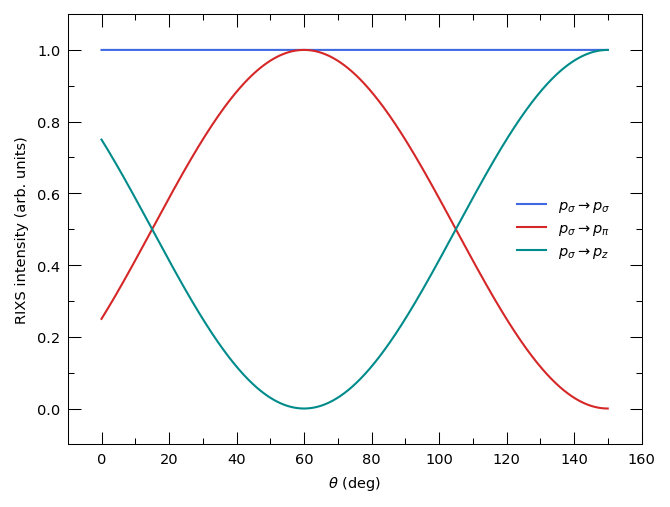

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6.75/1.5,6.75/2), dpi=150, gridspec_kw=dict(left=0.1, right=0.95, bottom=0.1, top=0.95))

for I, label, color in zip([I1,I2,I3], [r'$p_{\sigma} \rightarrow p_{\sigma}$     ', r'$p_{\sigma} \rightarrow p_{\pi}$', r'$p_{\sigma} \rightarrow p_z$'], ['royalblue','C3','darkcyan']):
    ax.plot(thins, I[1], label=label, lw=1, color=color)

make_theme(ax)
ax.legend(frameon=False, loc='right')
ax.set_xlabel(r'$\theta$ (deg)')
ax.set_ylabel('RIXS intensity (arb. units)')
ax.set_xlim(-10,160)
ax.set_ylim(-0.1,1.1)

# fig.savefig('angular_dep.pdf')